## Xarray-spatial local tools functions

### Sample data

In [1]:
import numpy as np
import xarray as xr

arr1 = xr.DataArray([[1, 1, 0, 0],
                     [np.nan, 1, 2, 2],
                     [4, 0, 0, 2],
                     [4, 0, 1, 1]], name='arr1')

arr2 = xr.DataArray([[0, 1, 1, 0],
                     [3, 3, 1, 2],
                     [np.nan, 0, 0, 2],
                     [3, 2, 1, 0]], name='arr2')

arr3 = xr.DataArray([[np.nan, 1, 0, 0],
                     [2, 0, 3, 3],
                     [0, 0, 3, 2],
                     [1, 1, np.nan, 0]], name='arr3')

raster_ds = xr.merge([arr1, arr2, arr3])

### Helping functions

In [2]:
import matplotlib.pyplot as plt

def plot_arrays(arr_list, title_list):
    fig, ax = plt.subplots(nrows=1, ncols=len(arr_list), figsize=(15, 10))
    
    for idx, arr in zip(range(0, len(arr_list)), arr_list):
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                text = ax[idx].text(j, i, int(arr.data[i, j]) if str(arr.data[i, j]) != 'nan' else np.nan,
                               ha='center', va='center', color='black')

        ax[idx].imshow(arr.values, cmap='tab20c_r')
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
        ax[idx].set_title(title_list[idx])

    plt.show()

### Combine

`xrspatial.local.combine` allow the combination of dimensions given a `xarray.Dataset` so that a unique output value is assigned to each unique combination.

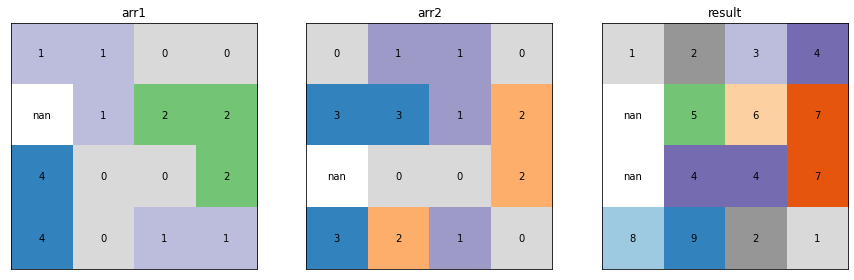

In [3]:
from xrspatial.local import combine

result_arr = combine(raster_ds[['arr1', 'arr2']])

plot_arrays(
    [
        raster_ds['arr1'],
        raster_ds['arr2'],
        result_arr,
    ],
    ['arr1', 'arr2', 'result']
)

### Equal To Frequency

`xrspatial.local.equal_frequency` evaluates on a cell-by-cell basis the number of times the values in a set of rasters are equal to another raster.

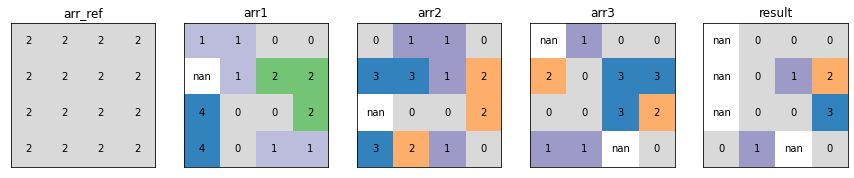

In [4]:
from xrspatial.local import equal_frequency

arr = xr.DataArray([[2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2]], name='arr')

input_ds = xr.merge([arr, raster_ds])

result_arr = equal_frequency(input_ds, 'arr')

plot_arrays(
    [
        input_ds['arr'],
        input_ds['arr1'],
        input_ds['arr2'],
        input_ds['arr3'],
        result_arr,
    ],
    ['arr_ref', 'arr1', 'arr2', 'arr3', 'result']
)

### Greater Than Frequency

`xrspatial.local.greater_frequency` evaluates on a cell-by-cell basis the number of times a set of rasters is greater than another raster.

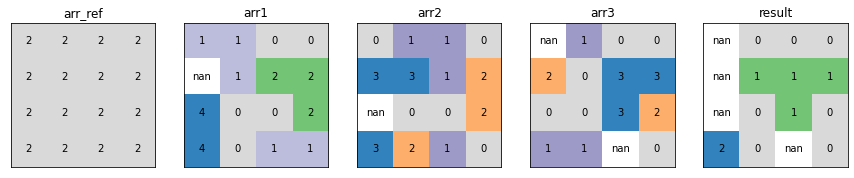

In [5]:
from xrspatial.local import greater_frequency

arr = xr.DataArray([[2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2]], name='arr')

input_ds = xr.merge([arr, raster_ds])

result_arr = greater_frequency(input_ds, 'arr')

plot_arrays(
    [
        input_ds['arr'],
        input_ds['arr1'],
        input_ds['arr2'],
        input_ds['arr3'],
        result_arr,
    ],
    ['arr_ref', 'arr1', 'arr2', 'arr3', 'result']
)

### Highest Position

`xrspatial.local.highest_position` determines on a cell-by-cell basis the position of the raster with the maximum value in a set of rasters.

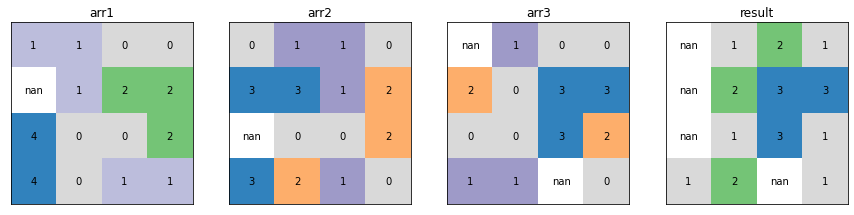

In [6]:
from xrspatial.local import highest_position

result_arr = highest_position(raster_ds)

plot_arrays(
    [
        raster_ds['arr1'],
        raster_ds['arr2'],
        raster_ds['arr3'],
        result_arr,
    ],
    ['arr1', 'arr2', 'arr3', 'result']
)

### Less Than Frequency

`xrspatial.local.lesser_frequency` evaluates on a cell-by-cell basis the number of times a set of rasters is less than another raster.

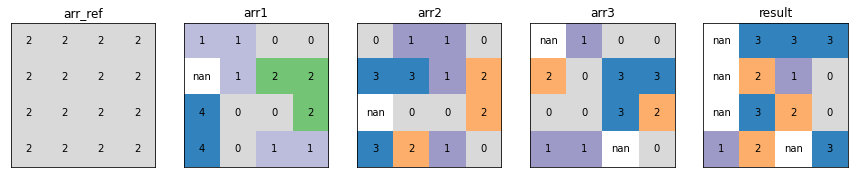

In [7]:
from xrspatial.local import lesser_frequency

arr = xr.DataArray([[2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2]], name='arr')

input_ds = xr.merge([arr, raster_ds])

result_arr = lesser_frequency(input_ds, 'arr')

plot_arrays(
    [
        input_ds['arr'],
        input_ds['arr1'],
        input_ds['arr2'],
        input_ds['arr3'],
        result_arr,
    ],
    ['arr_ref', 'arr1', 'arr2', 'arr3', 'result']
)

### Lowest Position

`xrspatial.local.lowest_position` determines on a cell-by-cell basis the position of the raster with the minimum value in a set of rasters.

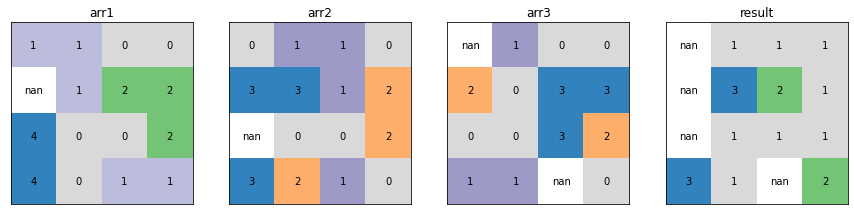

In [8]:
from xrspatial.local import lowest_position

result_arr = lowest_position(raster_ds)

plot_arrays(
    [
        raster_ds['arr1'],
        raster_ds['arr2'],
        raster_ds['arr3'],
        result_arr,
    ],
    ['arr1', 'arr2', 'arr3', 'result']
)

### Popularity

`xrspatial.local.popularity` determines the value in an argument list that is at a certain level of popularity on a cell-by-cell basis which the number of occurrences of each value is specified by the first argument.

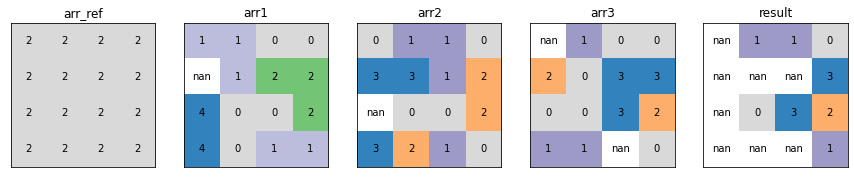

In [9]:
from xrspatial.local import popularity

arr = xr.DataArray([[2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2]], name='arr')

input_ds = xr.merge([arr, raster_ds])

result_arr = popularity(input_ds, 'arr')

plot_arrays(
    [
        input_ds['arr'],
        input_ds['arr1'],
        input_ds['arr2'],
        input_ds['arr3'],
        result_arr,
    ],
    ['arr_ref', 'arr1', 'arr2', 'arr3', 'result']
)

### Rank

`xrspatial.local.rank` rank the values from the set of input rasters on a cell-by-cell basis which of these gets returned is determined by the value of the rank input raster.

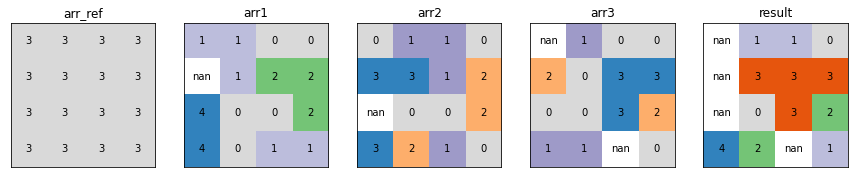

In [10]:
from xrspatial.local import rank

arr = xr.DataArray([[3, 3, 3, 3],
                    [3, 3, 3, 3],
                    [3, 3, 3, 3],
                    [3, 3, 3, 3]], name='arr')

input_ds = xr.merge([arr, raster_ds])

result_arr = rank(input_ds, 'arr')

plot_arrays(
    [
        input_ds['arr'],
        input_ds['arr1'],
        input_ds['arr2'],
        input_ds['arr3'],
        result_arr,
    ],
    ['arr_ref', 'arr1', 'arr2', 'arr3', 'result']
)